# Global Power Plant Database

In [1]:
# Importing Necessery liabraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)

In [2]:
#  Importing dataset
df = pd.read_csv("https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv")
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [3]:
df.shape

(907, 27)

# EDA(Exploratory Data Analysis)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

In [6]:
#checking unique values
df.nunique()

country                       1
country_long                  1
name                        907
gppd_idnr                   907
capacity_mw                 361
latitude                    836
longitude                   827
primary_fuel                  8
other_fuel1                   3
other_fuel2                   1
other_fuel3                   0
commissioning_year           73
owner                       280
source                      191
url                         304
geolocation_source            3
wepp_id                       0
year_of_capacity_data         1
generation_gwh_2013           0
generation_gwh_2014         371
generation_gwh_2015         396
generation_gwh_2016         403
generation_gwh_2017         408
generation_gwh_2018         410
generation_gwh_2019           0
generation_data_source        1
estimated_generation_gwh      0
dtype: int64

In [7]:
#checking null values
df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [8]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [12]:
df['country'].nunique()

1

In [13]:
df['country_long'].nunique()

1

In [14]:
df['commissioning_year'].nunique()

73

In [15]:
df['source'].nunique()

191

In [16]:
df.head(3)

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [22]:
#droping columns
df.drop(['country','country_long', 'name', 'gppd_idnr', 'other_fuel1', 'other_fuel2', 'other_fuel3','url', 'wepp_id'],axis = 1 , inplace = True)
df.drop(['estimated_generation_gwh','owner','year_of_capacity_data','generation_gwh_2013','generation_gwh_2019','generation_data_source'], axis = 1 , inplace = True)

In [23]:
df.shape

(907, 12)

In [24]:
# checking null values
df.isnull().sum()

capacity_mw              0
latitude                46
longitude               46
primary_fuel             0
commissioning_year     380
source                   0
geolocation_source      19
generation_gwh_2014    509
generation_gwh_2015    485
generation_gwh_2016    473
generation_gwh_2017    467
generation_gwh_2018    459
dtype: int64

<AxesSubplot:>

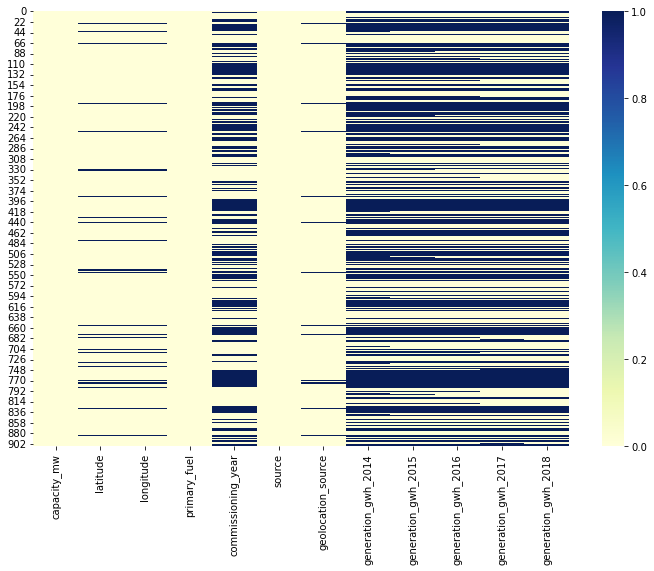

In [25]:
# Let's visualize the null values clearly
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull(),cmap="YlGnBu")

In [26]:
df.skew()

capacity_mw            3.123576
latitude              -0.145866
longitude              1.112646
commissioning_year    -1.067949
generation_gwh_2014    3.342707
generation_gwh_2015    3.665904
generation_gwh_2016    3.512370
generation_gwh_2017    3.566070
generation_gwh_2018    3.476298
dtype: float64

In [27]:
# let's check the mean of the latitude
df['latitude'].mean()

21.19791811846691

In [28]:
# filling missing values in latitude using mean
df['latitude']=df['latitude'].fillna(df['latitude'].mean())

In [29]:
# let's check the mode of geolocation_source column
df['geolocation_source'].mode() 

0    WRI
dtype: object

In [30]:
# filling null values by its mode WRI
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [31]:
# filling null values using their median values
df['longitude']=df['longitude'].fillna(df['longitude'].median())
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].median())
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median())

In [32]:
# let's check the null values if there any
df.isnull().sum()

capacity_mw            0
latitude               0
longitude              0
primary_fuel           0
commissioning_year     0
source                 0
geolocation_source     0
generation_gwh_2014    0
generation_gwh_2015    0
generation_gwh_2016    0
generation_gwh_2017    0
generation_gwh_2018    0
dtype: int64

<AxesSubplot:>

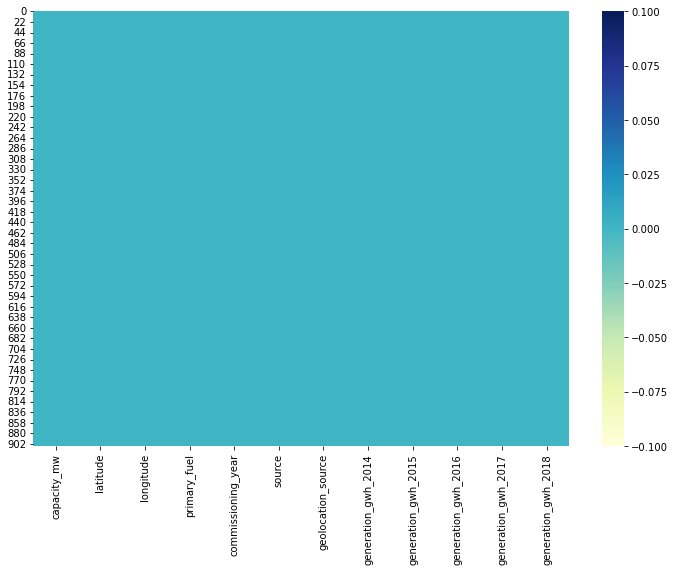

In [33]:
# let's visualize the null values clearly
plt.figure(figsize = (12,8))
sns.heatmap(df.isnull(),cmap="YlGnBu")

In [34]:
# checking how many columns are there in the dataset
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018'],
      dtype='object')

In [35]:
# checking the list of counts of capacity_mw
df['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     20
15.0      20
1200.0    19
          ..
291.0      1
645.0      1
41.4       1
17.5       1
106.6      1
Name: capacity_mw, Length: 361, dtype: int64

In [36]:
# checking the list of counts of primary_fuel
df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [37]:
# checking the uniqueness of primary_fuel
df['primary_fuel'].unique()

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [38]:
# checking the list of counts of commissioning_year
df['commissioning_year'].value_counts()

2001.0    395
2015.0     28
2013.0     25
2012.0     23
2016.0     19
         ... 
1954.0      1
1969.0      1
1939.0      1
1927.0      1
1953.0      1
Name: commissioning_year, Length: 73, dtype: int64

In [39]:
# let's extract power plant age from commissioning year by subtraction it from the year 2022
df['Power_plant_age'] = 2022 - df['commissioning_year']
df.drop(columns=['commissioning_year'],inplace=True)

In [40]:
# let's check the data frame 
df.head()

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,11.0
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,21.0
2,39.2,21.9038,69.3732,Wind,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,21.0
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,18.0
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,7.0


In [41]:
# Statistical summary of dataset
df.describe()

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.197918,77.427103,1516.689956,1510.071296,1565.361383,1657.121797,1665.011030,23.271224
std,590.085456,6.079148,4.815073,2785.604307,2984.994556,3005.087210,3046.862910,3168.826750,13.158621
min,0.000000,8.168900,68.644700,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
25%,16.725000,17.072000,74.388900,801.123775,711.181225,737.205450,817.977250,751.644375,19.000000
50%,59.200000,21.281800,76.719500,801.123775,711.181225,737.205450,817.977250,751.644375,21.000000
75%,385.250000,25.176450,79.206100,801.123775,711.181225,737.205450,817.977250,751.644375,24.000000
max,4760.000000,34.649000,95.408000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,95.000000


# Data Visualization:

In [42]:
# checking for categorical and numerical columns
categorical_col=[]
numerical_col=[]

for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)
        
print(f"""* Categorical Columns: {categorical_col}

* Numerical Columns: {numerical_col}""")

* Categorical Columns: ['primary_fuel', 'source', 'geolocation_source']

* Numerical Columns: ['capacity_mw', 'latitude', 'longitude', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'Power_plant_age']


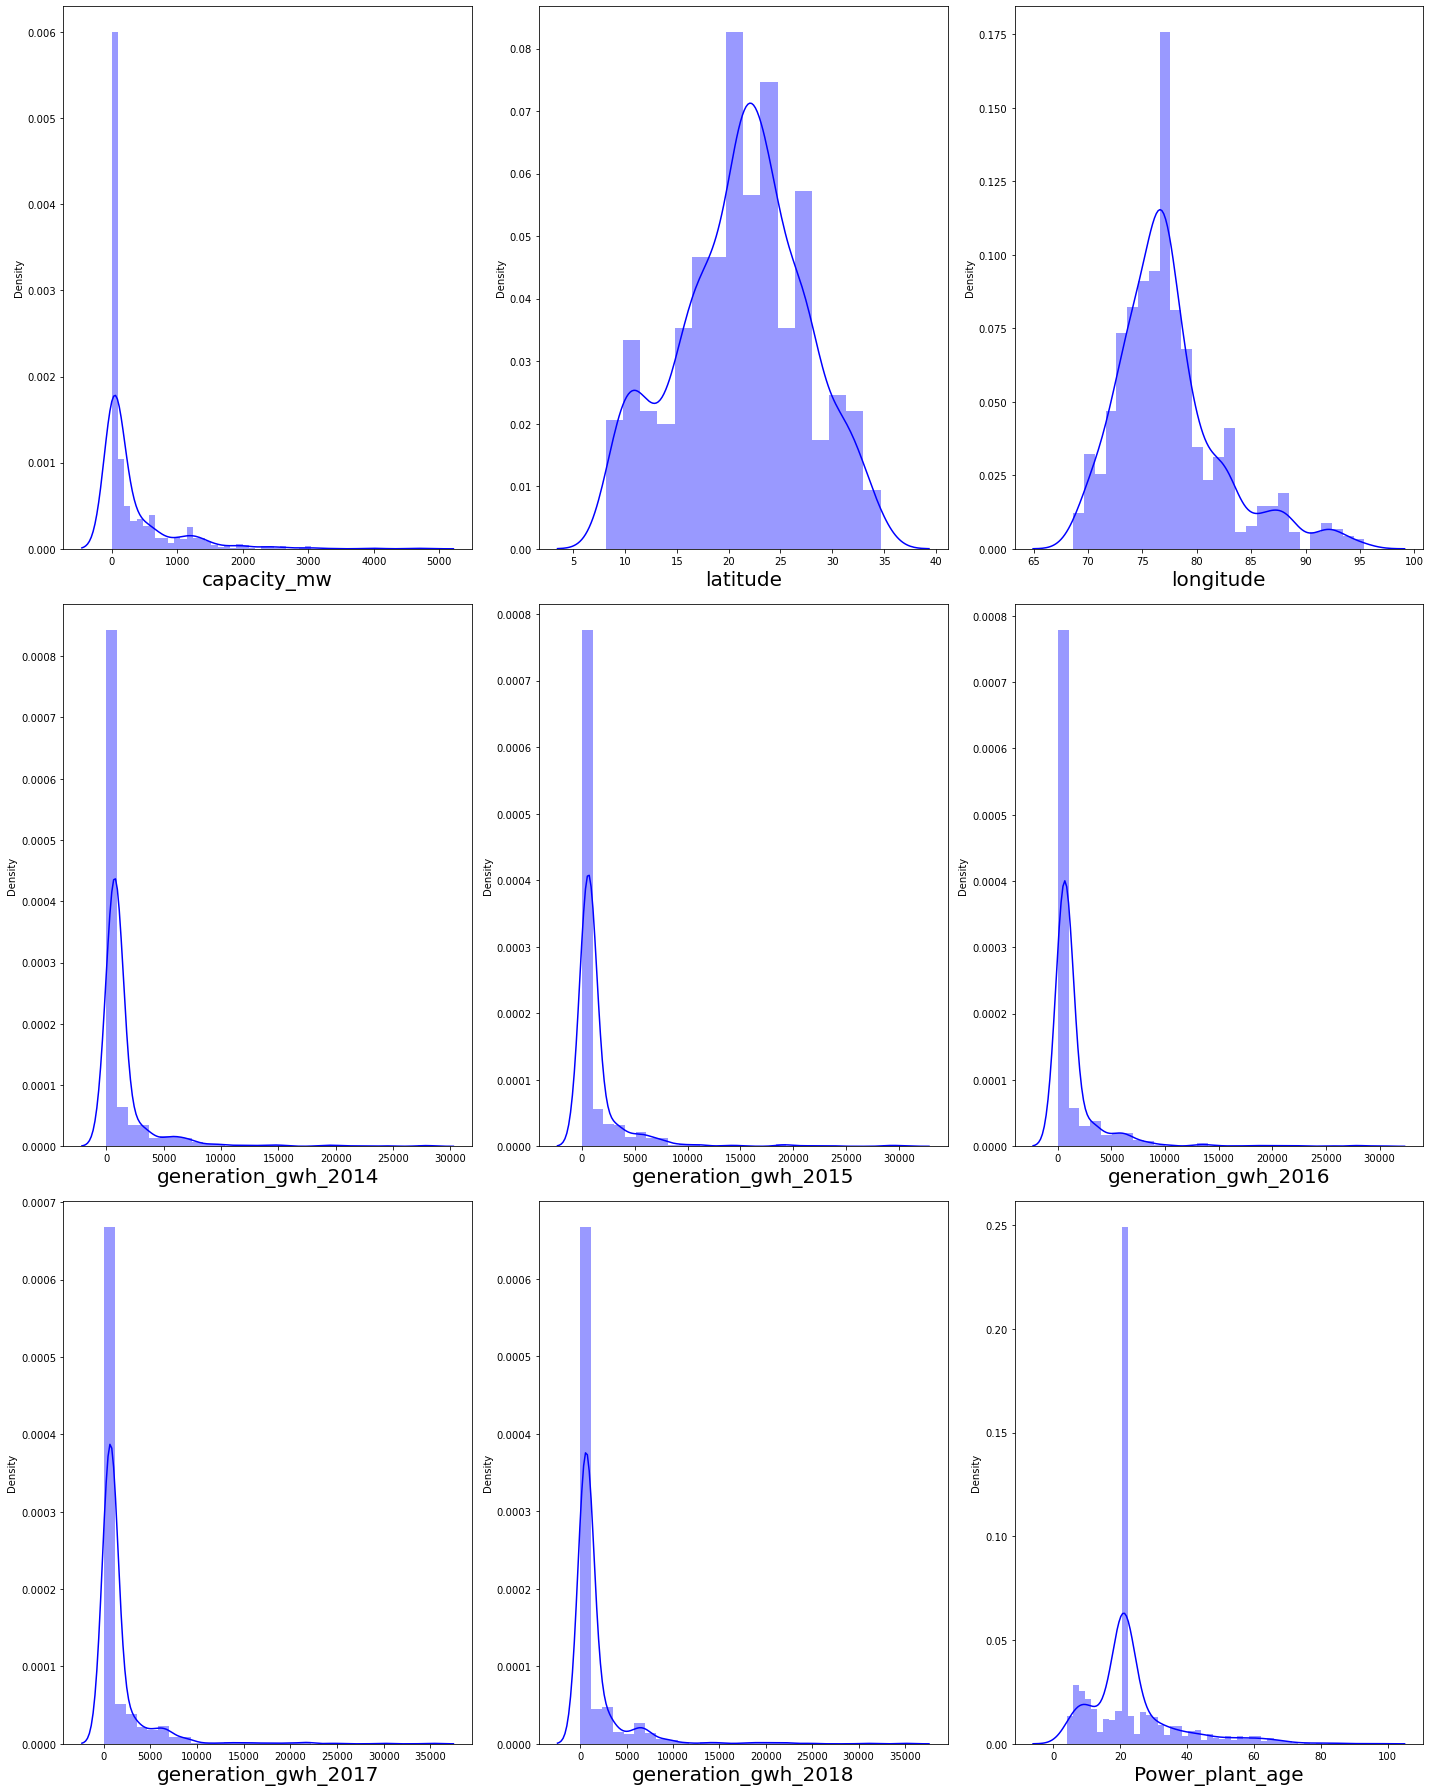

In [43]:
# checking how the data has been distributed in each column

plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color='b')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

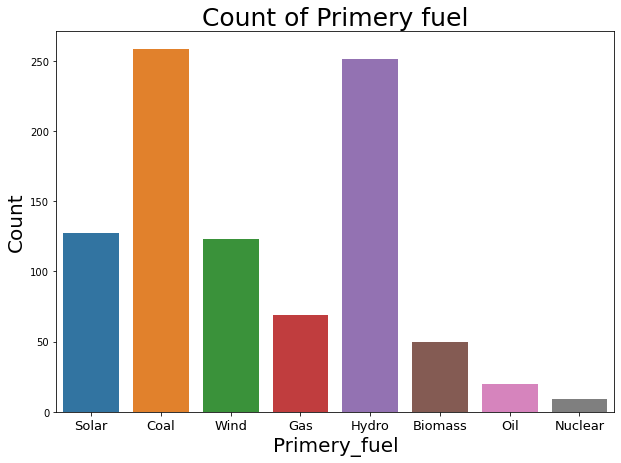

In [44]:
#Plotting categorical columns:
# Visualizing  the types of fuel in primary_fuel
plt.figure(figsize = (10,7))
sns.countplot(x="primary_fuel", data=df)

plt.title('Count of Primery fuel',fontsize=25)
plt.xlabel('Primery_fuel',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


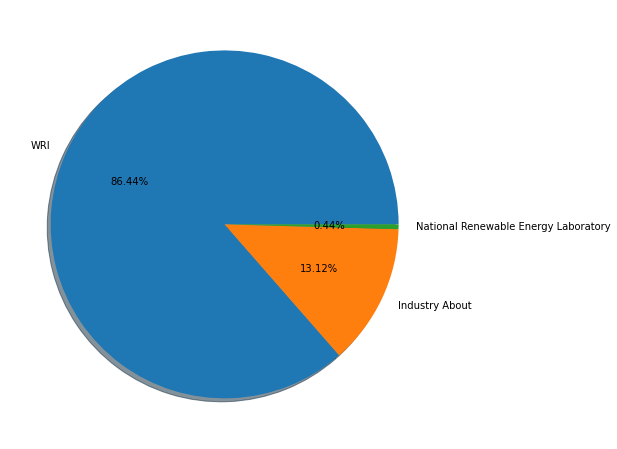

In [45]:
#Visualizing the counts of geolocation_source.
print(df['geolocation_source'].value_counts())

labels='WRI','Industry About','National Renewable Energy Laboratory'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['geolocation_source'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

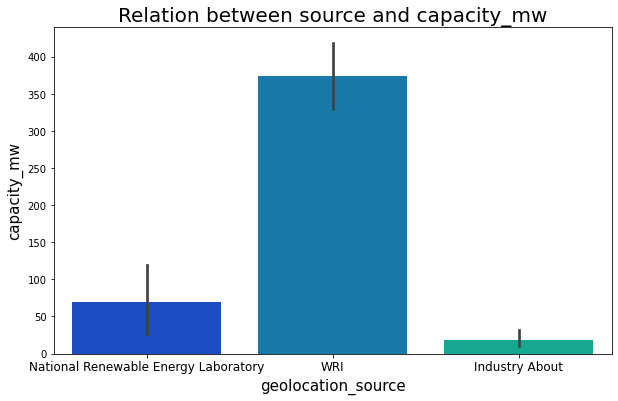

In [46]:
#Comparing target varibale 'capacity_mw' with features:
# let's check the relation between source and capacity_mw
plt.figure(figsize = (10,6))
sns.barplot(x = 'geolocation_source', y = 'capacity_mw', data=df,  palette="winter")

plt.title('Relation between source and capacity_mw',fontsize=20)
plt.xlabel('geolocation_source',fontsize=15)
plt.ylabel('capacity_mw',fontsize=15)
plt.xticks(fontsize=12) #,rotation=30)

plt.show()

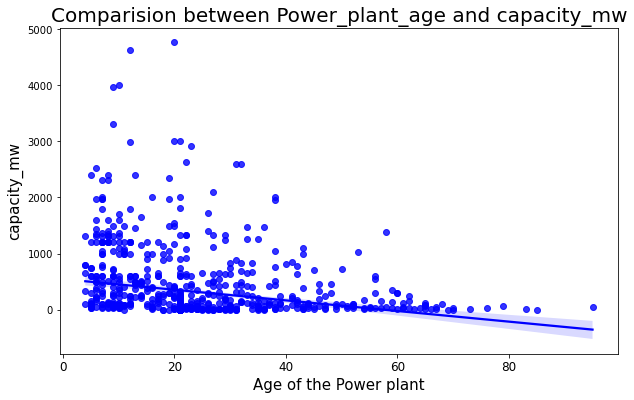

In [47]:
# Let's check how the Power_plant_age affects the capacity of the power plant
plt.figure(figsize=[10,6])
sns.regplot(df['Power_plant_age'],df['capacity_mw'],color = 'b')

plt.title('Comparision between Power_plant_age and capacity_mw',fontsize=20)
plt.xlabel('Age of the Power plant',fontsize=15)
plt.ylabel('capacity_mw',fontsize=15)
plt.xticks(fontsize=12)

plt.show()

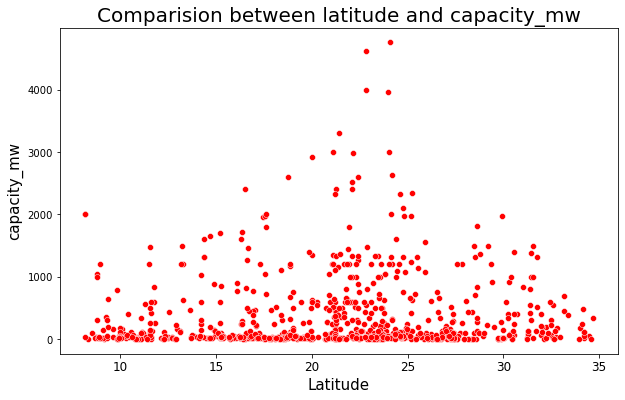

In [48]:
# let's check how the capacity is related to latitude  of the power plant
plt.figure(figsize=[10,6])
sns.scatterplot(df['latitude'],df['capacity_mw'],color='r')

plt.title('Comparision between latitude and capacity_mw',fontsize=20)
plt.xlabel('Latitude',fontsize=15)
plt.ylabel('capacity_mw',fontsize=15)
plt.xticks(fontsize=12)

plt.show()

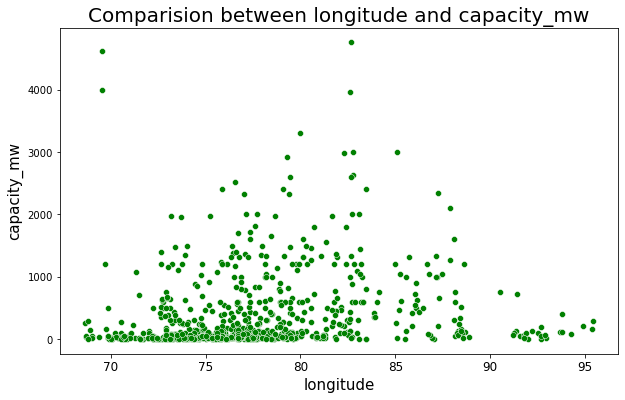

In [49]:
# let's check how the longitude related to the capacity of the power plant
plt.figure(figsize=[10,6])
sns.scatterplot(df['longitude'],df['capacity_mw'],color='g')

plt.title('Comparision between longitude and capacity_mw',fontsize=20)
plt.xlabel('longitude',fontsize=15)
plt.ylabel('capacity_mw',fontsize=15)
plt.xticks(fontsize=12)

plt.show()

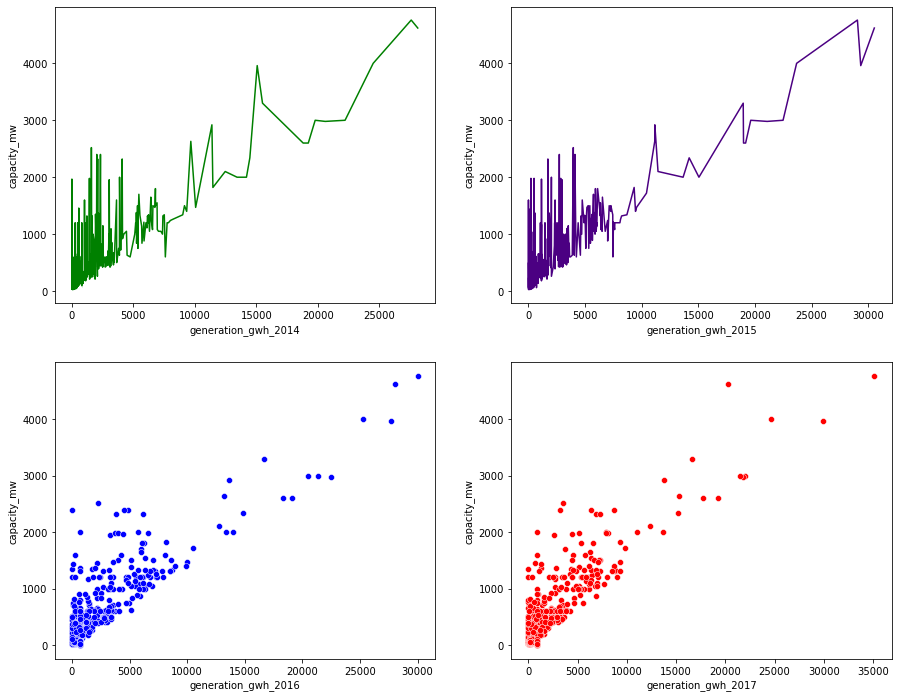

In [50]:
# let's check the capacity of the plant with respect to generation_gwh_2014, 2015, 2016 & 2017.

fig,axes=plt.subplots(2,2,figsize=(15,12))

# checking attrition level in Dailyrate
sns.lineplot(x='generation_gwh_2014', y='capacity_mw',ax=axes[0,0],data=df,color='g')

# checking attrition level in hourlyrate
sns.lineplot(x='generation_gwh_2015', y='capacity_mw',ax=axes[0,1],data=df,color='indigo')

# checking attrition level in Monthlyrate
sns.scatterplot(x='generation_gwh_2016', y='capacity_mw',ax=axes[1,0],data=df,color='b')

# checking attrition level Monthlyincome
sns.scatterplot(x='generation_gwh_2017', y='capacity_mw',ax=axes[1,1],data=df,color='r')
plt.show()

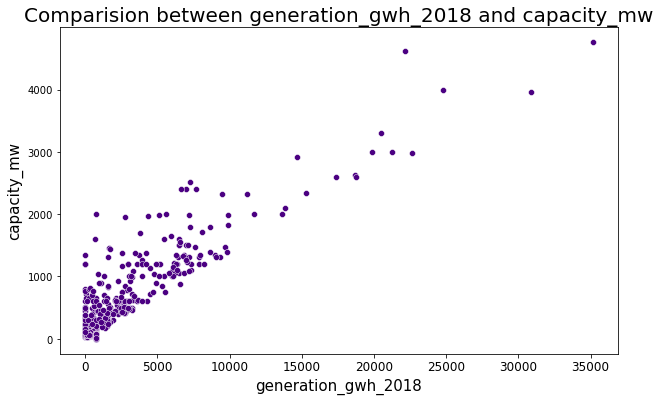

In [51]:
# checking attrition level Monthlyincome
plt.figure(figsize = (10,6))
sns.scatterplot(x='generation_gwh_2018', y='capacity_mw',data=df,color='indigo')

plt.title('Comparision between generation_gwh_2018 and capacity_mw',fontsize=20)
plt.xlabel('generation_gwh_2018',fontsize=15)
plt.ylabel('capacity_mw',fontsize=15)
plt.xticks(fontsize=12)

plt.show()

In [52]:
#Comparing the target variable 'primary_fuel' with other features:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'source',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'Power_plant_age'],
      dtype='object')

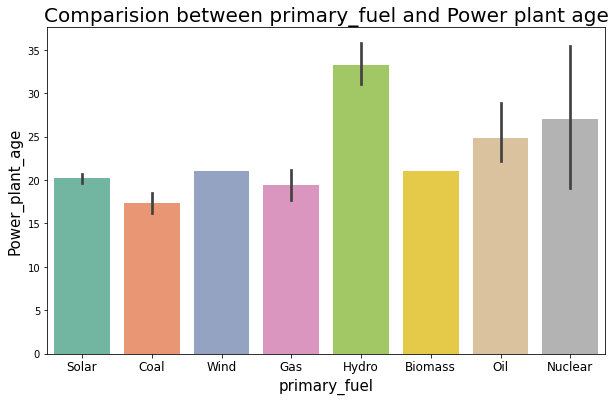

In [53]:
# Lets check how the power plant age affects Fuel Type
plt.figure(figsize = (10,6))
sns.barplot(x='primary_fuel',y='Power_plant_age', data=df, palette="Set2")

plt.title('Comparision between primary_fuel and Power plant age',fontsize=20)
plt.xlabel('primary_fuel',fontsize=15)
plt.ylabel('Power_plant_age',fontsize=15)
plt.xticks(fontsize=12)

plt.show()

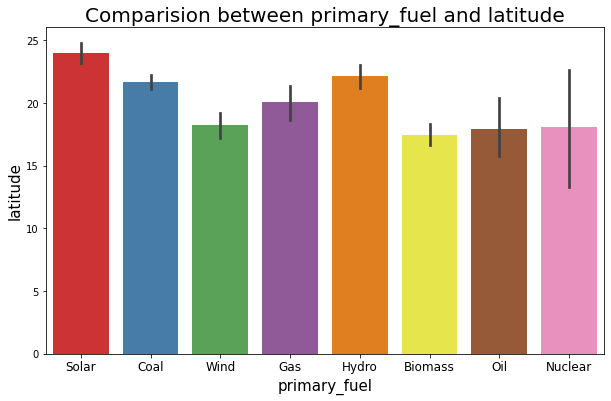

In [54]:
# Lets check how the fuel type is related to latitude of the power plant 
plt.figure(figsize = (10,6))
sns.barplot(x='primary_fuel',y='latitude', data=df, palette="Set1")

plt.title('Comparision between primary_fuel and latitude',fontsize=20)
plt.xlabel('primary_fuel',fontsize=15)
plt.ylabel('latitude',fontsize=15)
plt.xticks(fontsize=12)

plt.show()

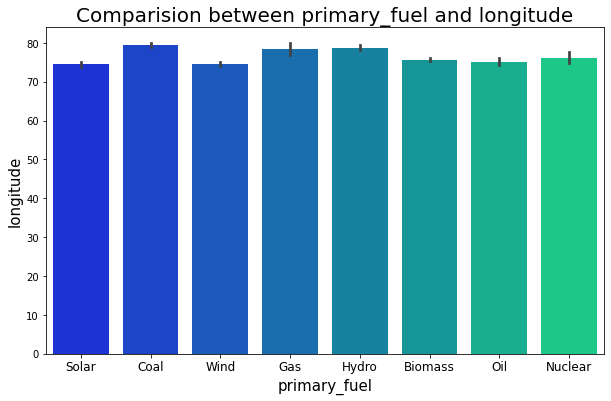

In [55]:
# Lets check how the fuel type is related to longitude of the power plant 
plt.figure(figsize = (10,6))
sns.barplot(x='primary_fuel',y='longitude', data=df, palette="winter")

plt.title('Comparision between primary_fuel and longitude',fontsize=20)
plt.xlabel('primary_fuel',fontsize=15)
plt.ylabel('longitude',fontsize=15)
plt.xticks(fontsize=12)

plt.show()

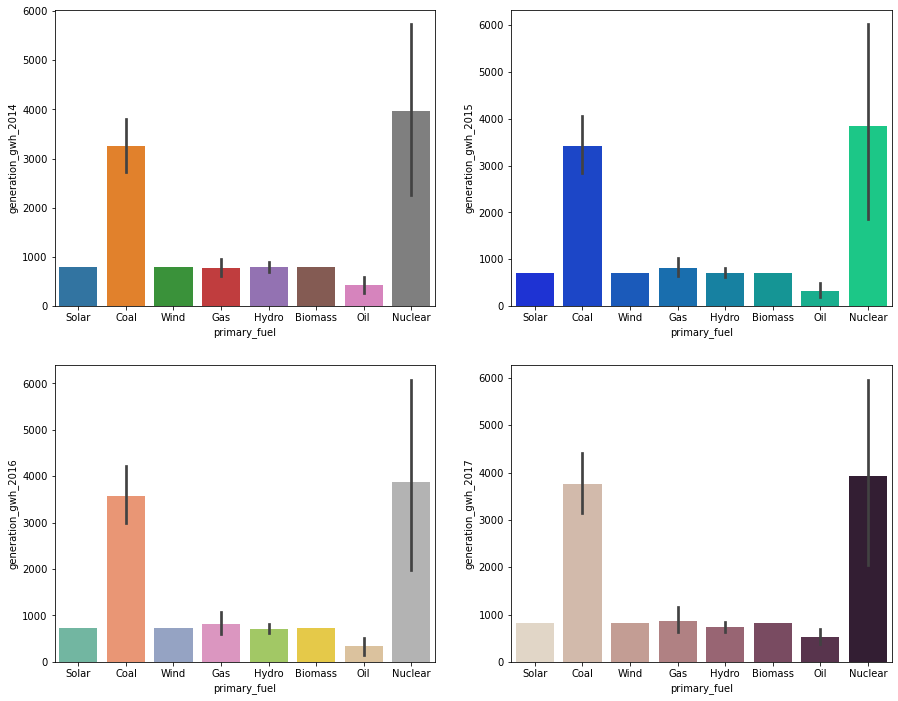

In [56]:
# let's check the fuel type with respect to generation_gwh_2014, 2015, 2016 & 2017.
fig,axes=plt.subplots(2,2,figsize=(15,12))

#checking attrition level in Dailyrate
sns.barplot(x='primary_fuel',y='generation_gwh_2014',ax=axes[0,0],data=df)

# checking attrition level in hourlyrate
sns.barplot(x='primary_fuel',y='generation_gwh_2015',ax=axes[0,1],data=df, palette="winter")

# checking attrition level in Monthlyrate
sns.barplot(x='primary_fuel',y='generation_gwh_2016',ax=axes[1,0],data=df,palette="Set2")

# checking attrition level Monthlyincome
sns.barplot(x='primary_fuel',y='generation_gwh_2017',ax=axes[1,1],data=df,palette="ch:.25")
plt.show()

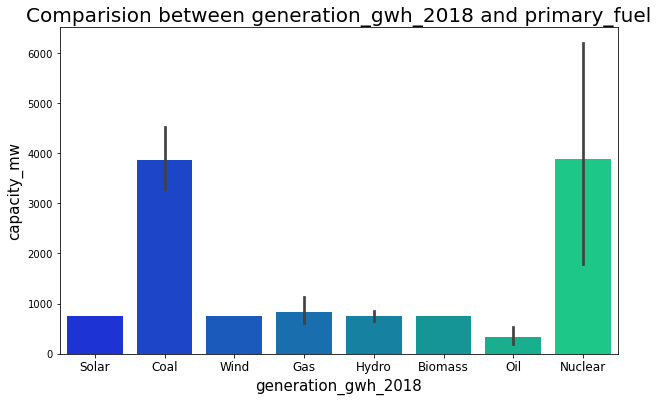

In [57]:
# checking attrition level Monthlyincome
plt.figure(figsize = (10,6))
sns.barplot(x='primary_fuel',y='generation_gwh_2018',data=df, palette="winter")

plt.title('Comparision between generation_gwh_2018 and primary_fuel',fontsize=20)
plt.xlabel('generation_gwh_2018',fontsize=15)
plt.ylabel('capacity_mw',fontsize=15)
plt.xticks(fontsize=12)

plt.show()

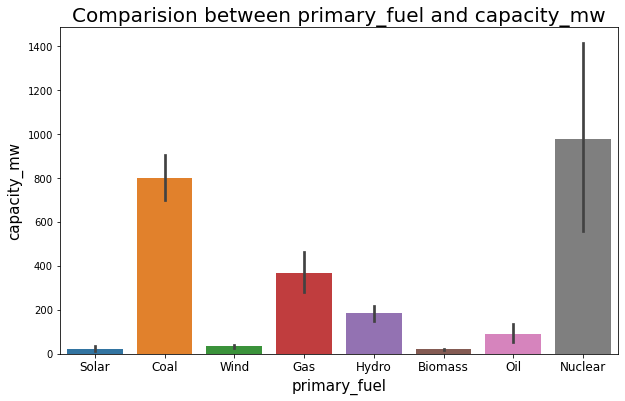

In [58]:
#Checking the relation between targets:
plt.figure(figsize = (10,6))
sns.barplot(x='primary_fuel',y='capacity_mw', data=df) #, palette="winter")

plt.title('Comparision between primary_fuel and capacity_mw',fontsize=20)
plt.xlabel('primary_fuel',fontsize=15)
plt.ylabel('capacity_mw',fontsize=15)
plt.xticks(fontsize=12)

plt.show()

LinAlgError: singular matrix

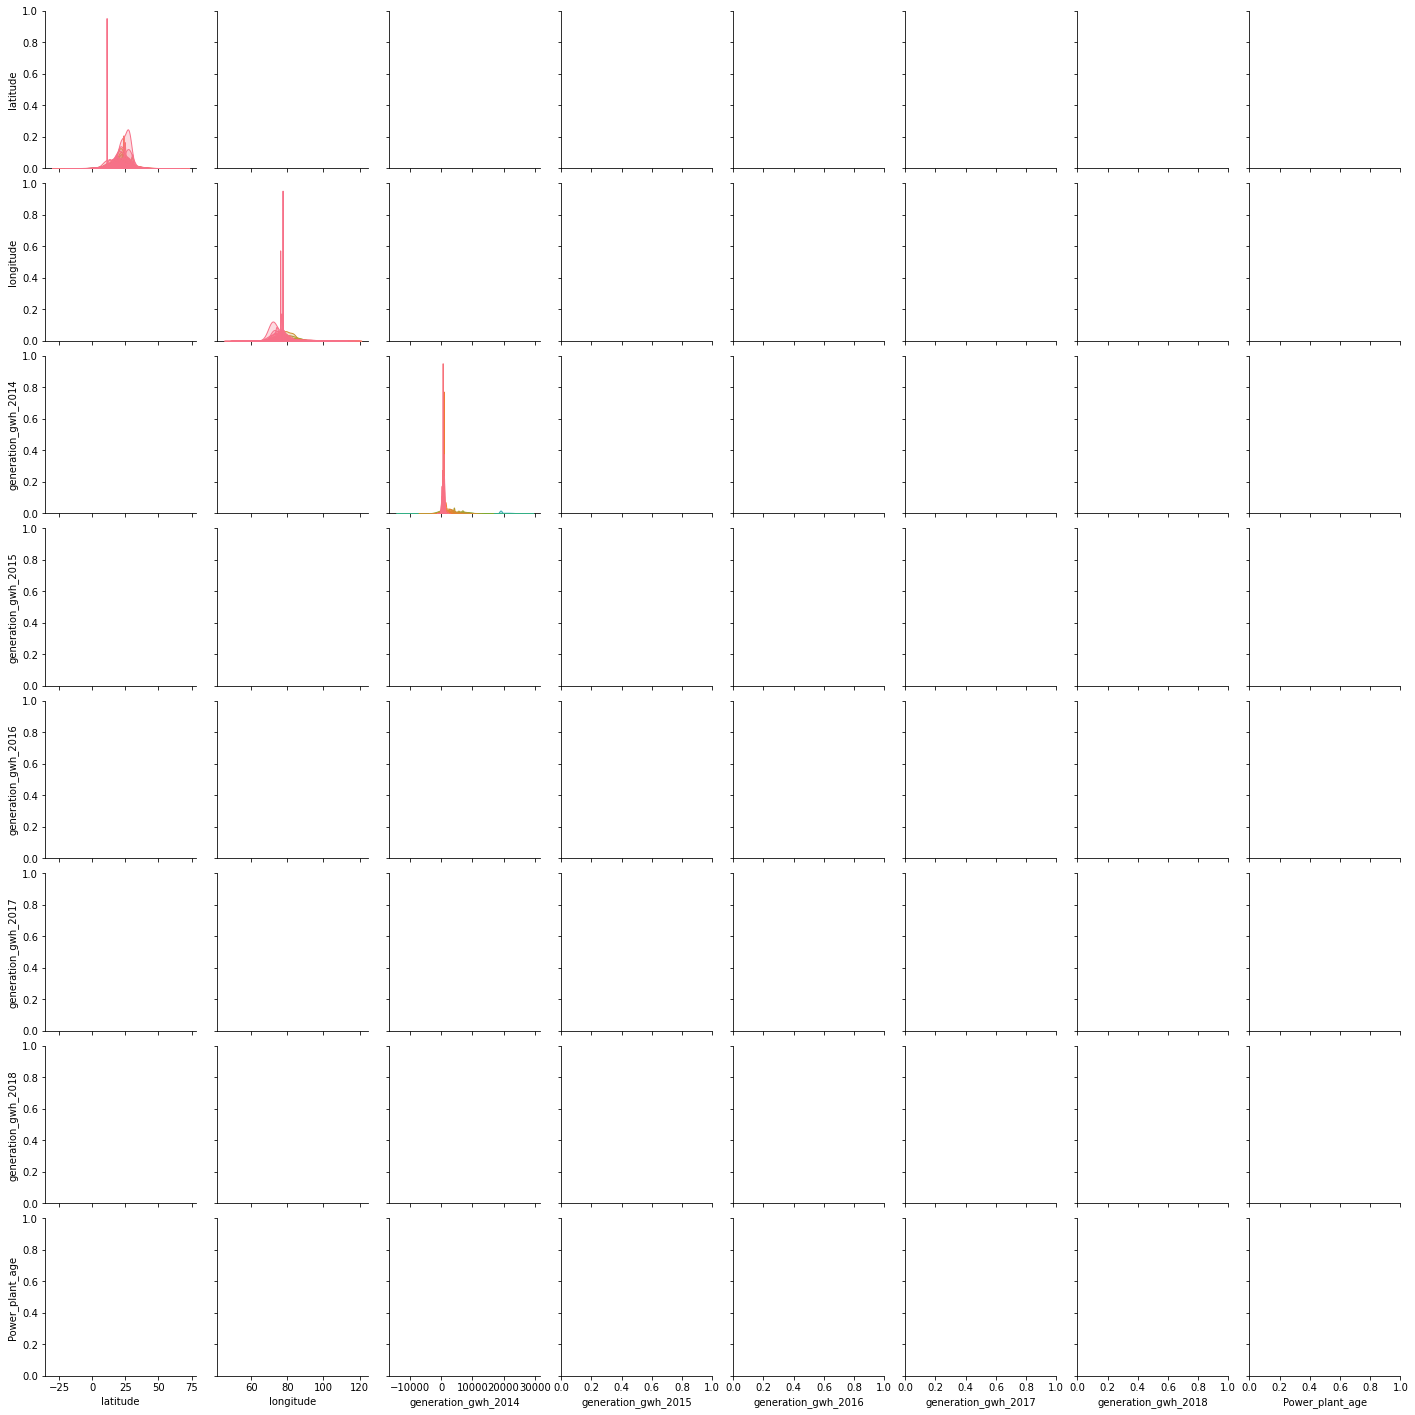

In [64]:
# Checking the pairwise relation between the features and label capacity in megawatt.
sns.pairplot(df,hue='capacity_mw',palette='husl')

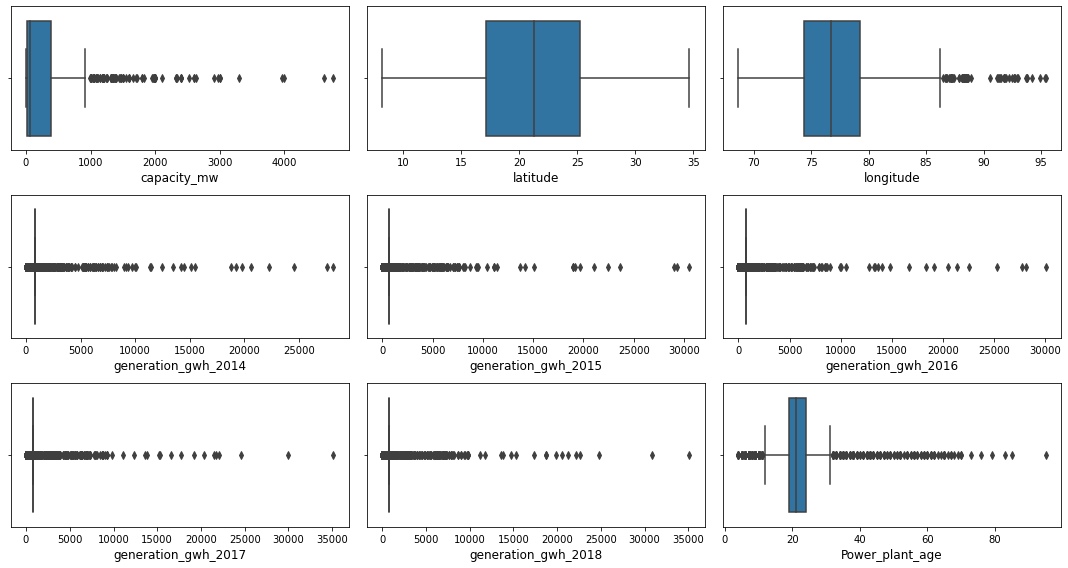

In [65]:
# indentifying the outlierspresent in numerical columns using boxplot

plt.figure(figsize=(15,8),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

In [66]:
#Removing Outliers
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'source',
       'geolocation_source', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'Power_plant_age'],
      dtype='object')

In [67]:
features = df[['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']]

In [68]:
#using zscore method to remove outliers
from scipy.stats import zscore

z=np.abs(zscore(features))
z

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,0.869917,0.257022,0.267783,0.275737,0.275565,0.288394,0.933076
1,0.585590,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
2,1.673567,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
3,2.895239,0.322873,0.223348,0.226194,0.326203,0.327990,0.400812
4,1.035238,0.545554,1.476964,1.557432,1.224379,1.772608,1.237227
...,...,...,...,...,...,...,...
902,0.014609,0.257022,0.505833,0.443415,0.259992,0.308963,1.313265
903,0.153415,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
904,0.383592,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699
905,0.764564,0.257022,0.267783,0.275737,0.275565,0.288394,0.172699


In [69]:
# creating new dataframe

new_df= df[(z<3).all(axis=1)]
new_df

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,28.1839,73.2407,Solar,National Renewable Energy Laboratory,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375,11.0
1,98.0,24.7663,74.6090,Coal,Ultratech Cement ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,21.0
2,39.2,21.9038,69.3732,Wind,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,21.0
3,135.0,23.8712,91.3602,Gas,Central Electricity Authority,WRI,617.789264,843.747000,886.004428,663.774500,626.239128,18.0
4,1800.0,21.9603,82.4091,Coal,Central Electricity Authority,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,Central Electricity Authority,WRI,801.123775,0.994875,233.596650,865.400000,686.500000,6.0
903,3.0,12.8932,78.1654,Solar,Karnataka Power Corporation Limited,Industry About,801.123775,711.181225,737.205450,817.977250,751.644375,21.0
904,25.5,15.2758,75.5811,Wind,CDM,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,21.0
905,80.0,24.3500,73.7477,Coal,Hindustan Zinc ltd,WRI,801.123775,711.181225,737.205450,817.977250,751.644375,21.0


In [70]:
df.shape

(907, 12)

In [71]:
new_df.shape

(851, 12)

In [72]:
# checking the data loss
data_loss = (908-852)/908*100
print(f"""data_loss : {data_loss} %""")

data_loss : 6.167400881057269 %


In [73]:
#IQR METHOD(Inter Quantile Range):
Q1 = features.quantile(0.25)

Q3 = features.quantile(0.75)

#IQR
IQR = Q3-Q1

df1= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [74]:
df1.shape

(420, 12)

In [75]:
# let's check the dataloss
data_loss = (908-420)/908*100
print(f"""data_loss : {data_loss} %""")

data_loss : 53.74449339207048 %


In [76]:
#Encoding the categorical columns using Label Encoding:
categorical_col

['primary_fuel', 'source', 'geolocation_source']

In [77]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
new_df[categorical_col]=new_df[categorical_col].apply(LE.fit_transform)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [78]:
new_df[categorical_col]

,primary_fuel,source,geolocation_source
0,6,109,1
1,1,174,2
2,7,21,2
3,2,22,2
4,1,22,2
...,...,...,...
902,1,22,2
903,6,77,0
904,7,21,2
905,1,59,2


In [79]:
# checking the correlation between features and the target
cor = new_df.corr()
cor

,capacity_mw,latitude,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
capacity_mw,1.000000,0.050588,0.257582,-0.398039,-0.275724,0.234543,0.620202,0.680949,0.750088,0.788972,0.815198,-0.241487
latitude,0.050588,1.000000,-0.014145,-0.002561,0.069430,-0.203340,0.081661,0.071346,0.057301,0.071296,0.064558,-0.097033
longitude,0.257582,-0.014145,1.000000,-0.382975,-0.235719,0.263739,0.119473,0.154522,0.195299,0.196529,0.204421,-0.080034
primary_fuel,-0.398039,-0.002561,-0.382975,1.000000,0.038558,-0.478601,-0.250101,-0.276308,-0.286624,-0.289232,-0.298364,0.074358
source,-0.275724,0.069430,-0.235719,0.038558,1.000000,-0.497893,-0.141496,-0.156317,-0.158561,-0.156155,-0.165232,-0.075353
geolocation_source,0.234543,-0.203340,0.263739,-0.478601,-0.497893,1.000000,0.113446,0.125329,0.127128,0.125199,0.132477,0.051608
generation_gwh_2014,0.620202,0.081661,0.119473,-0.250101,-0.141496,0.113446,1.000000,0.912185,0.801237,0.746130,0.738063,-0.059768
generation_gwh_2015,0.680949,0.071346,0.154522,-0.276308,-0.156317,0.125329,0.912185,1.000000,0.907984,0.830394,0.821726,-0.130252
generation_gwh_2016,0.750088,0.057301,0.195299,-0.286624,-0.158561,0.127128,0.801237,0.907984,1.000000,0.932729,0.913720,-0.199087
generation_gwh_2017,0.788972,0.071296,0.196529,-0.289232,-0.156155,0.125199,0.746130,0.830394,0.932729,1.000000,0.964318,-0.221382


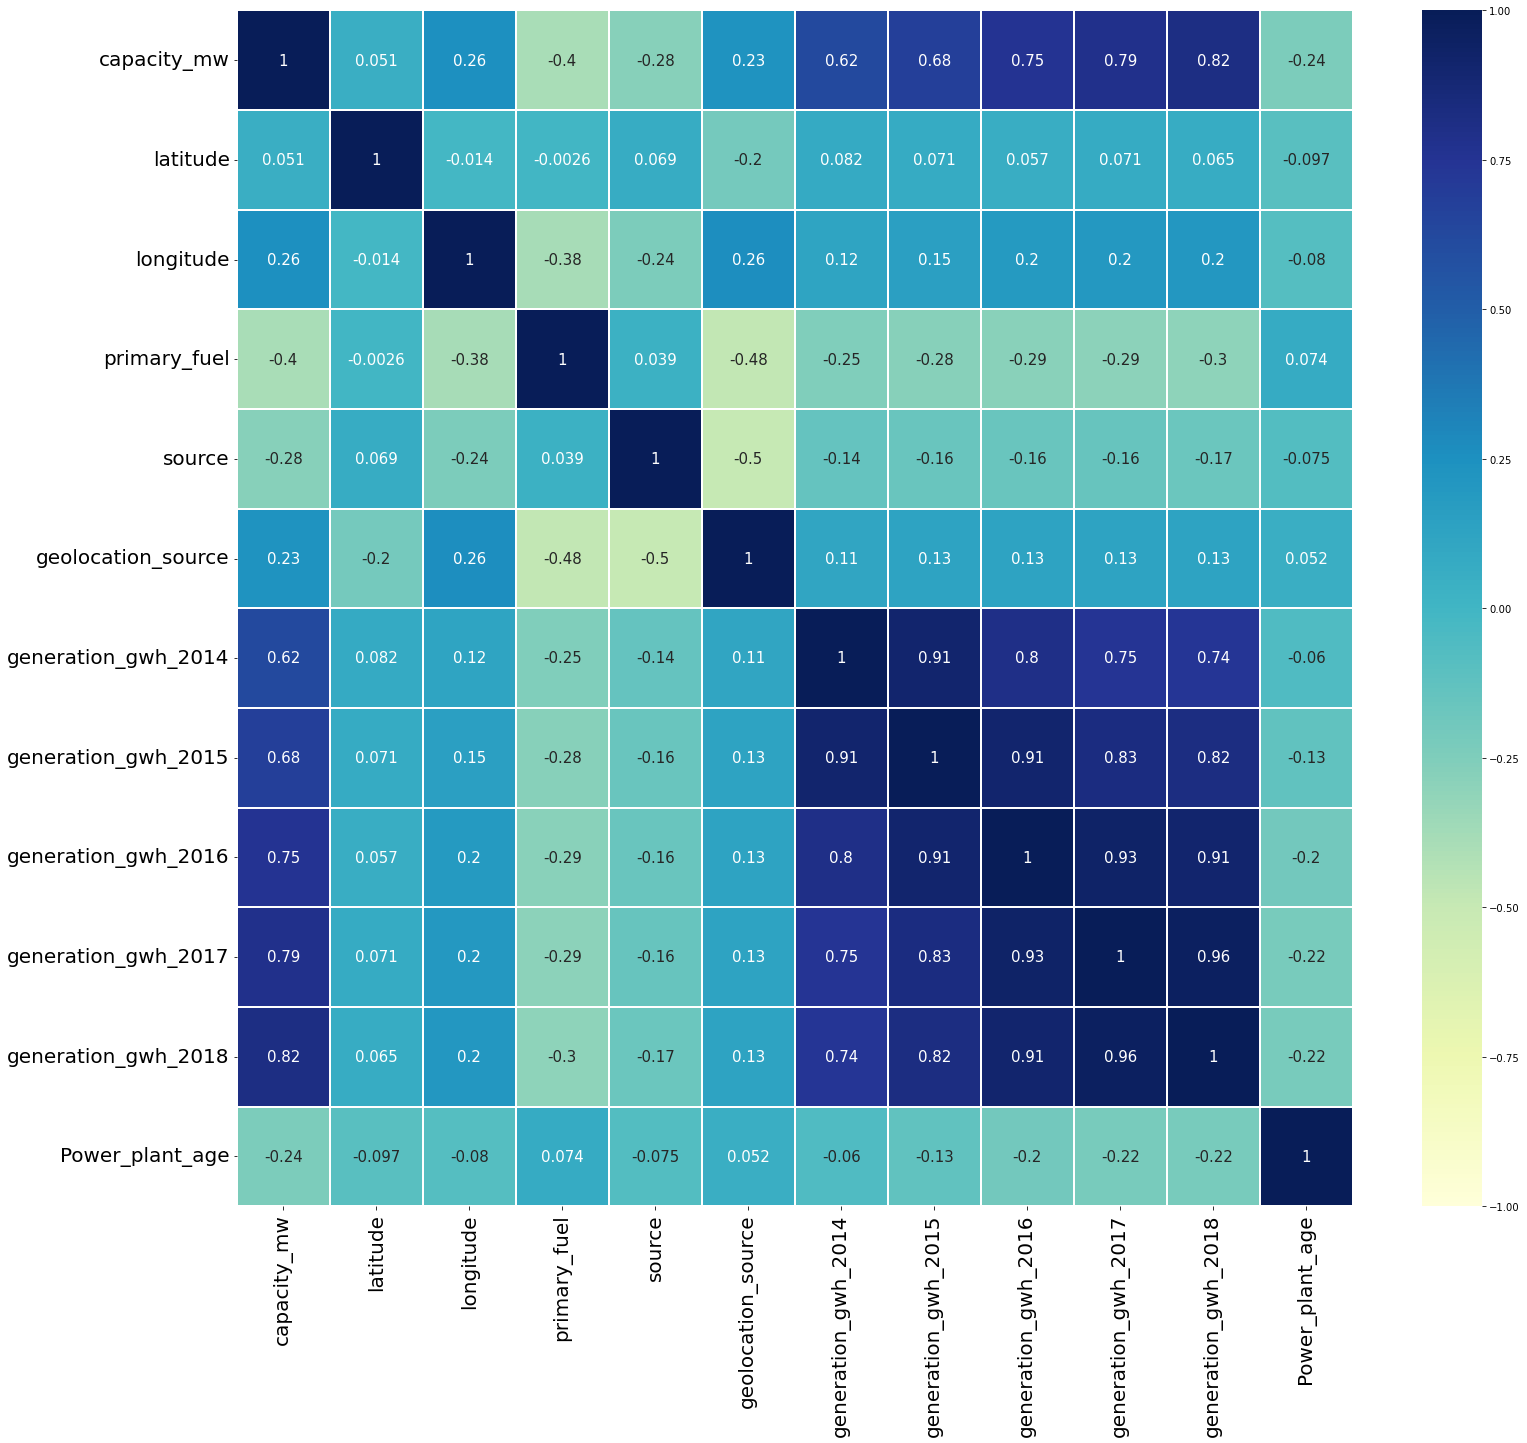

In [80]:
# visualizing the correlation matrix by plotting heat map

plt.figure(figsize=(25,22))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.2g', annot = True,annot_kws={'size':15},cmap="YlGnBu")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20,rotation=0);

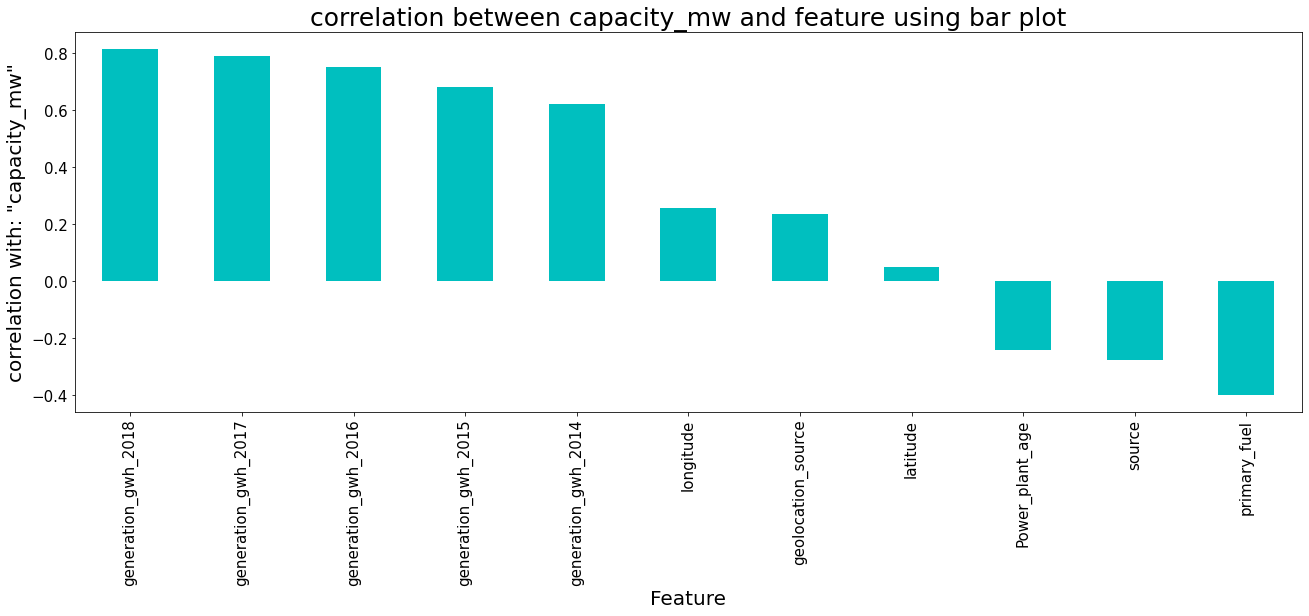

In [81]:
# correlation between capacity_mw and feature using bar plot
plt.figure(figsize=(22,7))
new_df.corr()['capacity_mw'].sort_values(ascending=False).drop(['capacity_mw']).plot(kind='bar',color='c')

plt.title('correlation between capacity_mw and feature using bar plot',fontsize=25)
plt.xlabel('Feature',fontsize=20)
plt.ylabel('correlation with: "capacity_mw"',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

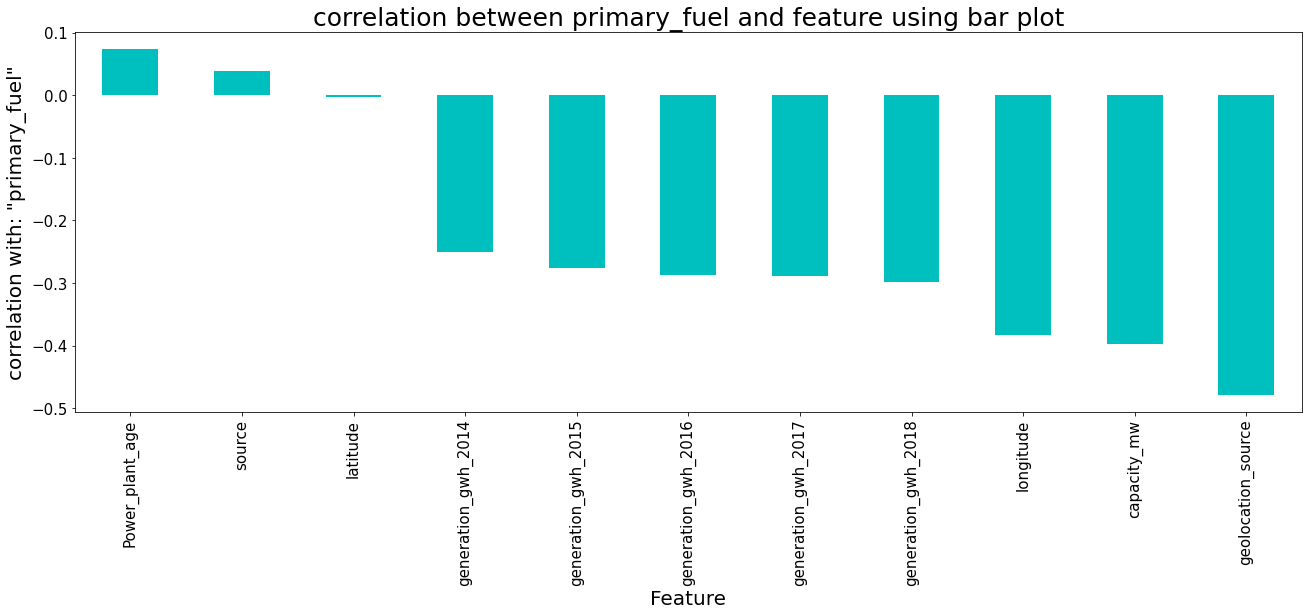

In [82]:
# correlation between primary_fuel and feature using bar plot
plt.figure(figsize=(22,7))
new_df.corr()['primary_fuel'].sort_values(ascending=False).drop(['primary_fuel']).plot(kind='bar',color='c')

plt.title('correlation between primary_fuel and feature using bar plot',fontsize=25)
plt.xlabel('Feature',fontsize=20)
plt.ylabel('correlation with: "primary_fuel"',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

In [83]:
# dropping irrelevant columns

new_df.drop('latitude',axis=1,inplace=True)

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [84]:
new_df.head()

,capacity_mw,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,2.5,73.2407,6,109,1,801.123775,711.181225,737.205450,817.977250,751.644375,11.0
1,98.0,74.6090,1,174,2,801.123775,711.181225,737.205450,817.977250,751.644375,21.0
2,39.2,69.3732,7,21,2,801.123775,711.181225,737.205450,817.977250,751.644375,21.0
3,135.0,91.3602,2,22,2,617.789264,843.747000,886.004428,663.774500,626.239128,18.0
4,1800.0,82.4091,1,22,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,7.0


In [85]:
#Prediction for 'capacity_mw':
# Separating the features and label variables into x and y

x= new_df.drop('capacity_mw',axis=1)
y= new_df['capacity_mw']

In [86]:
x.shape

(851, 10)

In [87]:
y.shape

(851,)

In [88]:
#Checking for SKEWNESS
x.skew()

longitude              0.945877
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

In [89]:
#Removing Skewness using yeo-johnson method:
skew = ['longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

x[skew] = scaler.fit_transform(x[skew].values)
x[skew].head()

,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.110868
1,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
2,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
3,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.249172
4,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.779328


In [90]:
# checking skewness after using yeo-johnson method
x.skew()

longitude             -0.000128
primary_fuel           0.413759
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.022168
dtype: float64

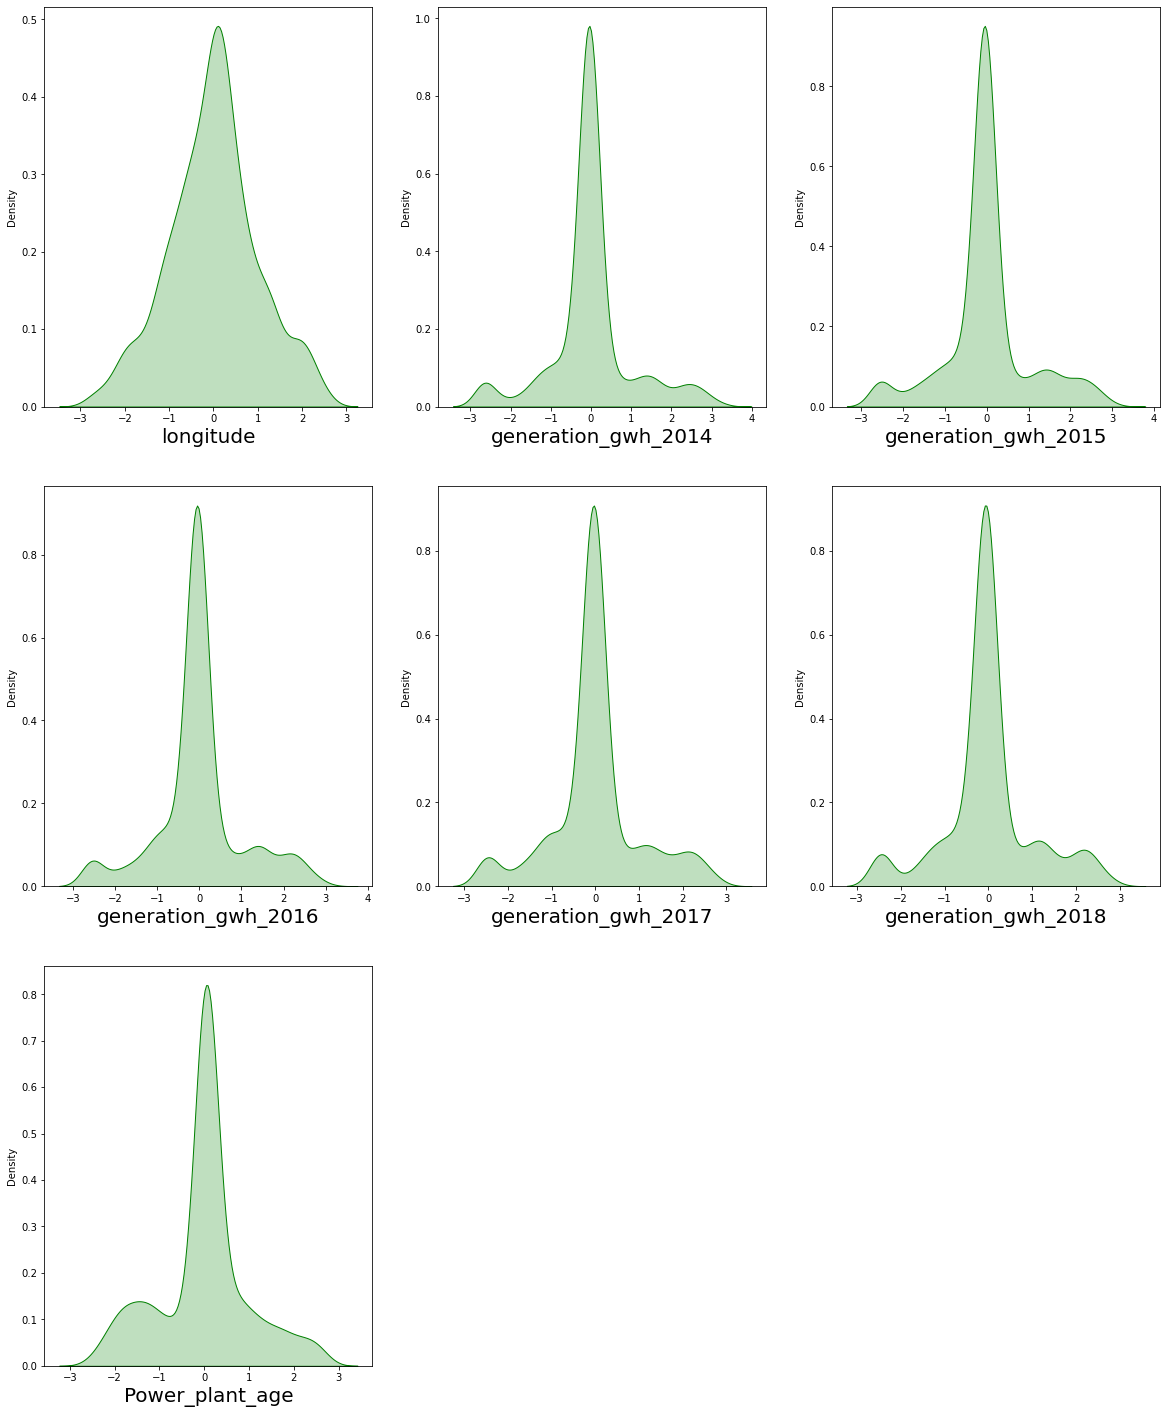

In [91]:
# checking how the data has been distributed in each columns.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x[column],color='g',kde_kws={'shade': True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,1.175506,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.110868
1,-0.499829,-0.975797,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
2,-2.377759,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
3,2.430594,-0.545536,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.249172
4,1.261979,-0.975797,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.779328
...,...,...,...,...,...,...,...,...,...,...
846,0.231932,-0.975797,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.982411
847,0.421592,1.175506,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
848,-0.224400,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
849,-0.760624,-0.975797,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442


In [93]:
#Checking VIF (Variance Inflation Factor ) Values:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF values'] = [variance_inflation_factor(x.values,i) for  i in range(len(x.columns))]
vif['features'] = x.columns

# let's check the values
vif

,VIF values,features
0,1.310090,longitude
1,1.683269,primary_fuel
2,1.503765,source
3,1.875821,geolocation_source
4,3.606669,generation_gwh_2014
5,6.181445,generation_gwh_2015
6,9.956016,generation_gwh_2016
7,9.748587,generation_gwh_2017
8,8.950941,generation_gwh_2018
9,1.105444,Power_plant_age


In [94]:
# DataFrame after preprocessing and data cleaning
x.head()

,longitude,primary_fuel,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-0.922012,1.175506,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.110868
1,-0.499829,-0.975797,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
2,-2.377759,1.605767,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
3,2.430594,-0.545536,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.249172
4,1.261979,-0.975797,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.779328


# Modeling

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [96]:
from sklearn.ensemble import RandomForestRegressor

maxAccu=0
maxRS=0

for i in range(1,350):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=i)
    mod = RandomForestRegressor()
    mod.fit(x_train,y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test,pred)
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        
print("Maximum r2 score (Best Accuracy) is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score (Best Accuracy) is  0.8685986819546465  on Random_state  185


In [97]:
#Creating new train test split:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=maxRS)

In [98]:
#Regression Algorithms:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [99]:
# checking r2 score for random forest regressor
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)

# prediction
predRFR=RFR.predict(x_test)
print('R2_Score:',r2_score(y_test,predRFR)*100,"%")
print('MAE:',metrics.mean_absolute_error(y_test,predRFR))
print('MSE:',metrics.mean_squared_error(y_test,predRFR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predRFR)))

R2_Score: 86.38871732539293 %
MAE: 82.9967169731134
MSE: 26891.47600511381
RNSE: 163.98620675262237


In [100]:
# checking r2 score for decision tree regressor
DTR = DecisionTreeRegressor()
DTR.fit(x_train,y_train)

# prediction
predDTR=DTR.predict(x_test)
print('R2_Score:',r2_score(y_test,predDTR)*100,"%")
print('MAE:',metrics.mean_absolute_error(y_test,predDTR))
print('MSE:',metrics.mean_squared_error(y_test,predDTR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predDTR)))

R2_Score: 72.17387698130597 %
MAE: 112.92503152246816
MSE: 54975.386035332376
RNSE: 234.46830496963204


In [101]:
# checking r2 score for Kneighbors regressor
knn = KNN()
knn.fit(x_train,y_train)

# prediction
predknn=knn.predict(x_test)
print('R2_Score:',r2_score(y_test,predknn)*100,"%")
print('MAE:',metrics.mean_absolute_error(y_test,predknn))
print('MSE:',metrics.mean_squared_error(y_test,predknn))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predknn)))

R2_Score: 79.99975915125782 %
MAE: 103.38131079812206
MSE: 39513.98334293821
RNSE: 198.78124494765146


In [102]:
# checking r2 score for gradient boosting regressor
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)

# prediction
predGB=GB.predict(x_test)
print('R2_Score:',r2_score(y_test,predGB)*100,"%")
print('MAE:',metrics.mean_absolute_error(y_test,predGB))
print('MSE:',metrics.mean_squared_error(y_test,predGB))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predGB)))

R2_Score: 85.13443682427335 %
MAE: 89.55796317372351
MSE: 29369.52710476984
RNSE: 171.37539818996729


In [103]:
# checking r2 score for bagging regressor
BR = BaggingRegressor()
BR.fit(x_train,y_train)

# prediction
predBR=BR.predict(x_test)
print('R2_Score:',r2_score(y_test,predBR)*100,"%")
print('MAE:',metrics.mean_absolute_error(y_test,predBR))
print('MSE:',metrics.mean_squared_error(y_test,predBR))
print('RNSE:',np.sqrt(metrics.mean_squared_error(y_test,predBR)))

R2_Score: 85.31536635965496 %
MAE: 85.44339364178788
MSE: 29012.069077069955
RNSE: 170.32929600356468


# Checking the cross validation score

In [104]:
# checking cv score for Random Forest Regressor
print(cross_val_score(RFR,x,y,cv=5).mean())

0.7802436877334883


In [105]:
# checking cv score for Decision Tree Regressor
print(cross_val_score(DTR,x,y,cv=5).mean())

0.579677120931074


In [106]:
# checking cv score for KNN Regressor
print(cross_val_score(knn,x,y,cv=5).mean())

0.7236455858684442


In [107]:
# checking cv score for Gradient Boosting Regressor
print(cross_val_score(GB,x,y,cv=5).mean())

0.752357593542771


In [108]:
# checking cv score for Bagging Regressor
print(cross_val_score(BR,x,y,cv=5).mean())

0.7699948020532913


# Hyper Parameter Tuning:

In [109]:
from sklearn.model_selection import GridSearchCV

# Random Forest Regressor
parameters = {'criterion':['mse','mae'],
             'max_features':['auto','sqrt','log2'],
             'n_estimators':[0,200],
             'max_depth':[2,3,4,6]}

In [110]:
GCV = GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [111]:
GCV.fit(x_train,y_train)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 349, in fit
    self._validate_estimator()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 133, in _validate_estimator
    raise ValueError("n_estimators must be greater than zero, "
ValueError: n_estimators must be greater than zero, got 0.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 349, in fit
    self._validate_estimator()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 133, in _validate_estimator
    raise ValueError("n_estimators must be greater than zero, "
ValueError: n_estimators must be greater than zero, got 0.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 349, in fit
    self._validate_estimator()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 133, in _validate_estimator
    raise ValueError("n_estimators must be greater than zero, "
ValueError: n_estimators must be greater than zero, got 0.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 349, in fit
    self._validate_estimator()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 133, in _validate_estimator
    raise ValueError("n_estimators must be greater than zero, "
ValueError: n_estimators must be greater than zero, got 0.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 349, in fit
    self._validate_estimator()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 133, in _validate_estimator
    raise ValueError("n_estimators must be greater than zero, "
ValueError: n_estimators must be greater than zero, got 0.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 349, in fit
    self._validate_estimator()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 133, in _validate_estimator
    raise ValueError("n_estimators must be greater than zero, "
ValueError: n_estimators must be greater than zero, got 0.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 349, in fit
    self._validate_estimator()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 133, in _validate_estimator
    raise ValueError("n_estimators must be greater than zero, "
ValueError: n_estimators must be greater than zero, got 0.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 349, in fit
    self._validate_estimator()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 133, in _validate_estimator
    raise ValueError("n_estimators must be greater than zero, "
ValueError: n_estimators must be greater than zero, got 0.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 349, in fit
    self._validate_estimator()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 133, in _validate_estimator
    raise ValueError("n_estimators must be greater than zero, "
ValueError: n_estimators must be greater than zero, got 0.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 349, in fit
    self._validate_estimator()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 133, in _validate_estimator
    raise ValueError("n_estimators must be greater than zero, "
ValueError: n_estimators must be greater than zero, got 0.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 349, in fit
    self._validate_estimator()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 133, in _validate_estimator
    raise ValueError("n_estimators must be greater than zero, "
ValueError: n_estimators must be greater than zero, got 0.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 349, in fit
    self._validate_estimator()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_base.py", line 133, in _validate_estimator
    raise ValueError("n_estimators must be greater than zero, "
ValueError: n_estimators must be greater than zero, got 0.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this trai

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.72011533        nan 0.70178814        nan 0.70264592
        nan 0.74649723        nan 0.738232          nan 0.73603499
        nan 0.76057781        nan 0.7555011         nan 0.74588513
        nan 0.75818719        nan 0.76348306        nan 0.76436197
        nan 0.69367262        nan 0.67603005        nan 0.68129386
        nan 0.73000976        nan 0.71583736        nan 0.71847204
        nan 0.75207485        nan 0.74123422        nan 0.74340549
        nan 0.76734165        nan 0.76326184        nan 0.76172391]
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 3, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 200]})

In [112]:
GCV.best_params_

{'criterion': 'mae',
 'max_depth': 6,
 'max_features': 'auto',
 'n_estimators': 200}

In [113]:
capacity = RandomForestRegressor(criterion='mae',max_depth=6, max_features='auto', n_estimators=200)
capacity.fit(x_train,y_train)
pred = capacity.predict(x_test)
print("RMSE value:",np.sqrt(metrics.mean_squared_error(y_test,predRFR)))
print('R2_Score:',r2_score(y_test,pred)*100,"%")

RMSE value: 163.98620675262237
R2_Score: 88.01776856741549 %


In [114]:
#Saving the Model:
import joblib
joblib.dump(capacity,"Global_Power_Plant_(IND)_capacity_mw.pkl")

['Global_Power_Plant_(IND)_capacity_mw.pkl']

# Prediction for 'primary_fuel':

In [115]:
#Separating the features and label variables into x_df and y_df
x_df = new_df.drop("primary_fuel", axis=1)
y_df = new_df["primary_fuel"]

In [116]:
x_df.shape

(851, 10)

In [117]:
y_df.shape

(851,)

In [118]:
#Checking for SKEWNESS
x_df.skew()

capacity_mw            2.170245
longitude              0.945877
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    2.943026
generation_gwh_2015    2.714999
generation_gwh_2016    2.645786
generation_gwh_2017    2.546541
generation_gwh_2018    2.597029
Power_plant_age        1.280800
dtype: float64

In [120]:
skew =['capacity_mw','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018','Power_plant_age']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [121]:
x_df[skew] = scaler.fit_transform(x_df[skew].values)
x_df[skew].head()

,capacity_mw,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.110868
1,0.220284,-0.499829,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
2,-0.274381,-2.377759,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
3,0.391670,2.430594,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.249172
4,1.731859,1.261979,1.426798,2.286603,2.276671,1.983083,2.347272,-1.779328


In [122]:
# checking skewness after using yeo-johnson method
x_df.skew()

capacity_mw            0.016303
longitude             -0.000128
source                 1.734252
geolocation_source    -2.066536
generation_gwh_2014    0.232399
generation_gwh_2015    0.163587
generation_gwh_2016    0.147035
generation_gwh_2017    0.127152
generation_gwh_2018    0.133691
Power_plant_age        0.022168
dtype: float64

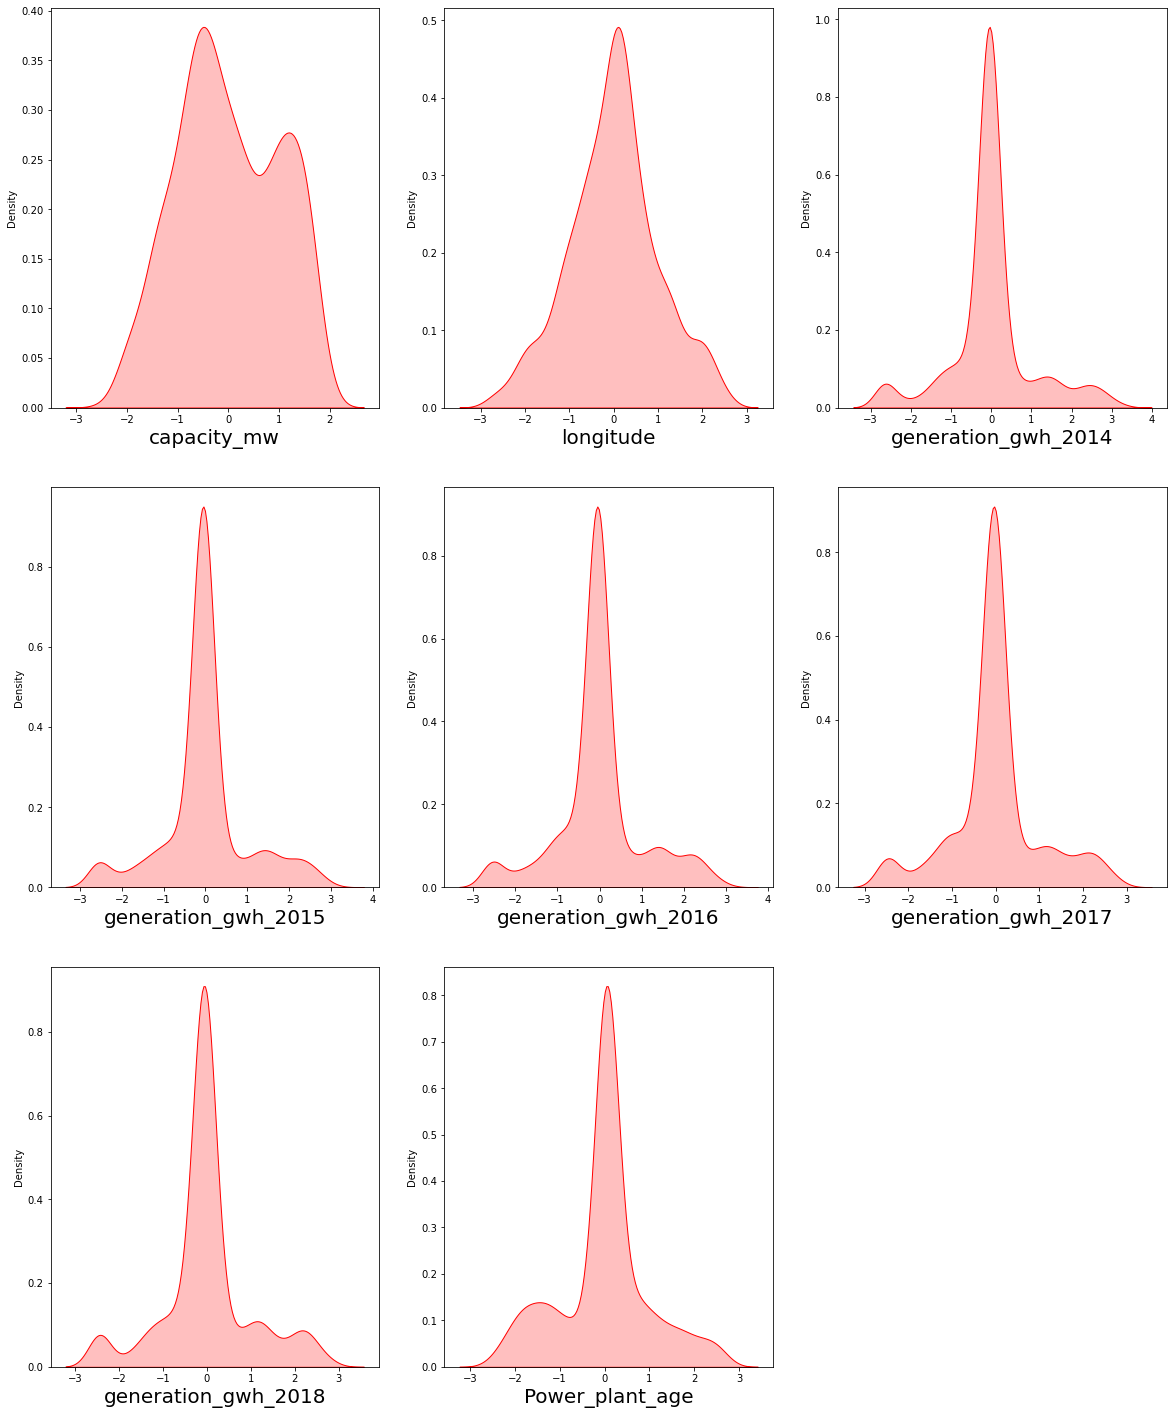

In [123]:
# let's check how the data has been distributed in each column

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in x_df[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(x_df[column],color='r',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [124]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_df = pd.DataFrame(scaler.fit_transform(x_df), columns=x_df.columns)
x_df

,capacity_mw,longitude,source,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,Power_plant_age
0,-1.677389,-0.922012,1.397951,-1.036523,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,-1.110868
1,0.220284,-0.499829,2.821796,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
2,-0.274381,-2.377759,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
3,0.391670,2.430594,-0.507812,0.407145,-0.268922,0.093773,0.105691,-0.199692,-0.194159,-0.249172
4,1.731859,1.261979,-0.507812,0.407145,1.426798,2.286603,2.276671,1.983083,2.347272,-1.779328
...,...,...,...,...,...,...,...,...,...,...
846,1.672840,0.231932,-0.507812,0.407145,-0.044061,-2.461379,-0.842266,0.010837,-0.126054,-1.982411
847,-1.598186,0.421592,0.696980,-2.480190,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
848,-0.507278,-0.224400,-0.529717,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442
849,0.111201,-0.760624,0.302685,0.407145,-0.044061,-0.049141,-0.046103,-0.035226,-0.057181,0.051442


In [125]:
#Checking VIF values:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(x_df.values,i)
              for i in range(len(x_df.columns))]
vif["Features"] = x_df.columns
vif

,VIF values,Features
0,1.814763,capacity_mw
1,1.193803,longitude
2,1.412954,source
3,1.591030,geolocation_source
4,3.625589,generation_gwh_2014
5,6.189896,generation_gwh_2015
6,9.959672,generation_gwh_2016
7,9.765110,generation_gwh_2017
8,8.960648,generation_gwh_2018
9,1.158205,Power_plant_age


In [126]:
y_df.value_counts()

1    238
3    220
6    126
7    123
2     65
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

# Modeling

In [128]:
#Finding the best random state:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
macRS=0
for i in range(1,350):
    x_df_train,x_df_test,y_df_train,y_df_test = train_test_split(x_df,y_df,test_size=.25,random_state=i)
    DTC = DecisionTreeClassifier()
    DTC.fit(x_df_train,y_df_train)
    pred = DTC.predict(x_df_test)
    acc=accuracy_score(y_df_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"% on Random_state ",maxRS)

Best accuracy is  0.8685446009389671 % on Random_state  284


In [129]:
#Creating train_test_split:
x_df_train,x_df_test,y_df_train,y_df_test=train_test_split(x_df,y_df,test_size=.25,random_state=maxRS)

In [130]:
#Classification Algorithms:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [131]:
# checking accuracy for decision tree classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_df_train,y_df_train)

# prediction
predDTC = DTC.predict(x_df_test)

print(accuracy_score(y_df_test, predDTC))
print(confusion_matrix(y_df_test, predDTC))
print(classification_report(y_df_test, predDTC))

0.8544600938967136
[[ 6  3  0  0  0  0  0]
 [ 3 41  6  2  1  0  0]
 [ 0  3  9  5  0  0  0]
 [ 0  4  1 53  1  0  0]
 [ 0  1  1  0  3  0  0]
 [ 0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.67      0.67      0.67         9
           1       0.79      0.77      0.78        53
           2       0.53      0.53      0.53        17
           3       0.88      0.90      0.89        59
           5       0.60      0.60      0.60         5
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        38

    accuracy                           0.85       213
   macro avg       0.78      0.78      0.78       213
weighted avg       0.85      0.85      0.85       213



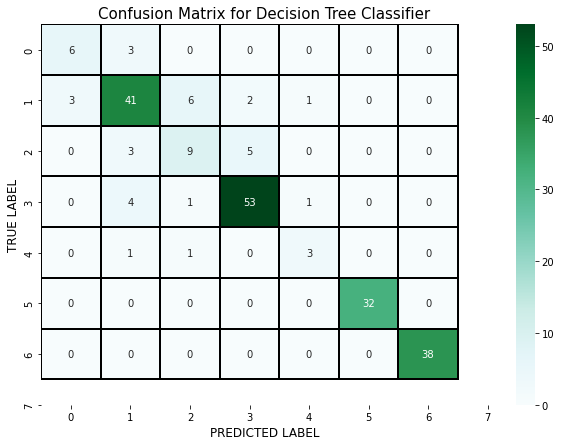

In [132]:
# let's plot confusion matrix for DTC
cm = confusion_matrix(y_df_test,predDTC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL",fontsize = 12)
plt.ylabel("TRUE LABEL",fontsize = 12)
plt.title("Confusion Matrix for Decision Tree Classifier",fontsize = 15)
plt.show()

In [133]:
#Random Forest Classifier:
RFC = RandomForestClassifier()
RFC.fit(x_df_train,y_df_train)

# prediction
predRFC = RFC.predict(x_df_test)

print(accuracy_score(y_df_test, predRFC))
print(confusion_matrix(y_df_test, predRFC))
print(classification_report(y_df_test, predRFC))

0.8779342723004695
[[ 7  2  0  0  0  0  0]
 [ 3 46  0  3  1  0  0]
 [ 0  4  6  7  0  0  0]
 [ 0  3  1 55  0  0  0]
 [ 0  1  1  0  3  0  0]
 [ 0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.82      0.87      0.84        53
           2       0.75      0.35      0.48        17
           3       0.85      0.93      0.89        59
           5       0.75      0.60      0.67         5
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        38

    accuracy                           0.88       213
   macro avg       0.84      0.79      0.80       213
weighted avg       0.87      0.88      0.87       213



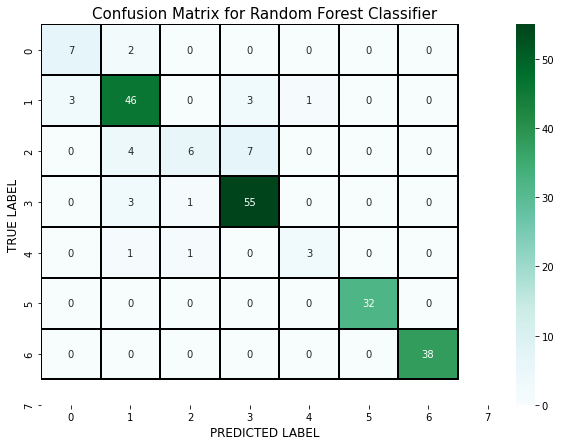

In [134]:
# let's plot confusion matrix for RFC
cm = confusion_matrix(y_df_test,predRFC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL",fontsize = 12)
plt.ylabel("TRUE LABEL",fontsize = 12)
plt.title("Confusion Matrix for Random Forest Classifier",fontsize = 15)
plt.show()

In [135]:
#Support Vector Classifier:
svc = SVC()
svc.fit(x_df_train,y_df_train)

# prediction
predsvc = svc.predict(x_df_test)

print(accuracy_score(y_df_test, predsvc))
print(confusion_matrix(y_df_test, predsvc))
print(classification_report(y_df_test, predsvc))

0.7699530516431925
[[ 8  1  0  0  0  0  0]
 [ 5 41  1  4  0  0  2]
 [ 0  9  3  4  0  0  1]
 [ 0  9  0 42  0  0  8]
 [ 0  1  4  0  0  0  0]
 [ 0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.62      0.89      0.73         9
           1       0.67      0.77      0.72        53
           2       0.38      0.18      0.24        17
           3       0.84      0.71      0.77        59
           5       0.00      0.00      0.00         5
           6       1.00      1.00      1.00        32
           7       0.78      1.00      0.87        38

    accuracy                           0.77       213
   macro avg       0.61      0.65      0.62       213
weighted avg       0.74      0.77      0.75       213



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


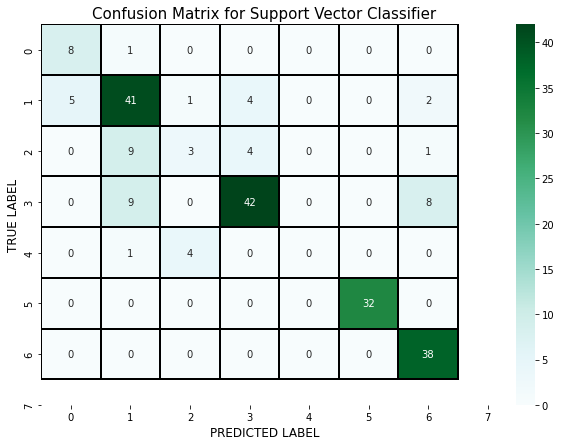

In [136]:
# let's plot confusion matrix for SVC
cm = confusion_matrix(y_df_test,predsvc)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL",fontsize = 12)
plt.ylabel("TRUE LABEL",fontsize = 12)
plt.title("Confusion Matrix for Support Vector Classifier",fontsize = 15)
plt.show()

In [137]:
#KNeighbors Classifier:
knn = KNN()
knn.fit(x_df_train,y_df_train)

# prediction
predknn = knn.predict(x_df_test)

print(accuracy_score(y_df_test, predknn))
print(confusion_matrix(y_df_test, predknn))
print(classification_report(y_df_test, predknn))

0.812206572769953
[[ 6  3  0  0  0  0  0]
 [ 5 41  1  5  0  0  1]
 [ 0  4  6  6  0  0  1]
 [ 0  3  2 50  0  0  4]
 [ 0  1  2  2  0  0  0]
 [ 0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.55      0.67      0.60         9
           1       0.79      0.77      0.78        53
           2       0.55      0.35      0.43        17
           3       0.79      0.85      0.82        59
           5       0.00      0.00      0.00         5
           6       1.00      1.00      1.00        32
           7       0.86      1.00      0.93        38

    accuracy                           0.81       213
   macro avg       0.65      0.66      0.65       213
weighted avg       0.79      0.81      0.80       213



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


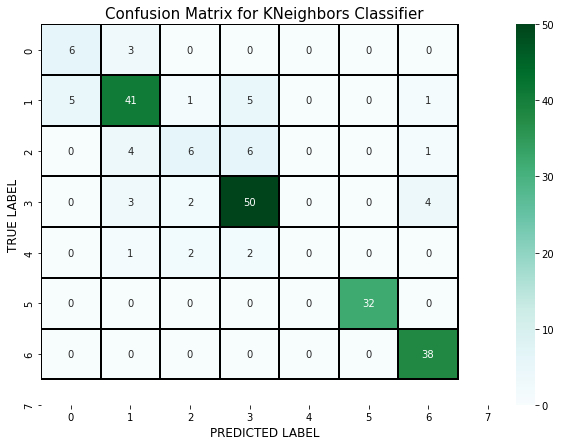

In [138]:
# let's plot confusion matrix for KNN
cm = confusion_matrix(y_df_test,predknn)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL",fontsize = 12)
plt.ylabel("TRUE LABEL",fontsize = 12)
plt.title("Confusion Matrix for KNeighbors Classifier",fontsize = 15)
plt.show()

In [139]:
#Gradient Boosting Classifier:
GB = GradientBoostingClassifier()
GB.fit(x_df_train,y_df_train)

# prediction
predGB = GB.predict(x_df_test)

print(accuracy_score(y_df_test, predGB))
print(confusion_matrix(y_df_test, predGB))
print(classification_report(y_df_test, predGB))

0.8779342723004695
[[ 7  2  0  0  0  0  0]
 [ 3 44  0  4  2  0  0]
 [ 0  3  8  6  0  0  0]
 [ 0  3  2 54  0  0  0]
 [ 0  1  0  0  4  0  0]
 [ 0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.83      0.83      0.83        53
           2       0.80      0.47      0.59        17
           3       0.84      0.92      0.88        59
           5       0.67      0.80      0.73         5
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        38

    accuracy                           0.88       213
   macro avg       0.83      0.83      0.82       213
weighted avg       0.88      0.88      0.87       213



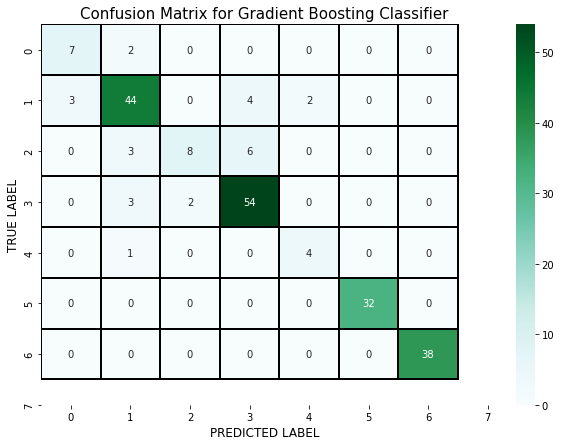

In [140]:
# let's plot confusion matrix for GB
cm = confusion_matrix(y_df_test,predGB)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL",fontsize = 12)
plt.ylabel("TRUE LABEL",fontsize = 12)
plt.title("Confusion Matrix for Gradient Boosting Classifier",fontsize = 15)
plt.show()

In [141]:
#Bagging Classifier:
BC = BaggingClassifier()
BC.fit(x_df_train,y_df_train)

# prediction
predBC = BC.predict(x_df_test)

print(accuracy_score(y_df_test, predBC))
print(confusion_matrix(y_df_test, predBC))
print(classification_report(y_df_test, predBC))

0.8403755868544601
[[ 7  2  0  0  0  0  0  0]
 [ 3 40  4  3  1  2  0  0]
 [ 0  2  9  6  0  0  0  0]
 [ 0  6  2 51  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]
 [ 0  1  2  0  0  2  0  0]
 [ 0  0  0  0  0  0 32  0]
 [ 0  0  0  0  0  0  0 38]]
              precision    recall  f1-score   support

           0       0.70      0.78      0.74         9
           1       0.78      0.75      0.77        53
           2       0.53      0.53      0.53        17
           3       0.85      0.86      0.86        59
           4       0.00      0.00      0.00         0
           5       0.50      0.40      0.44         5
           6       1.00      1.00      1.00        32
           7       1.00      1.00      1.00        38

    accuracy                           0.84       213
   macro avg       0.67      0.67      0.67       213
weighted avg       0.84      0.84      0.84       213



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


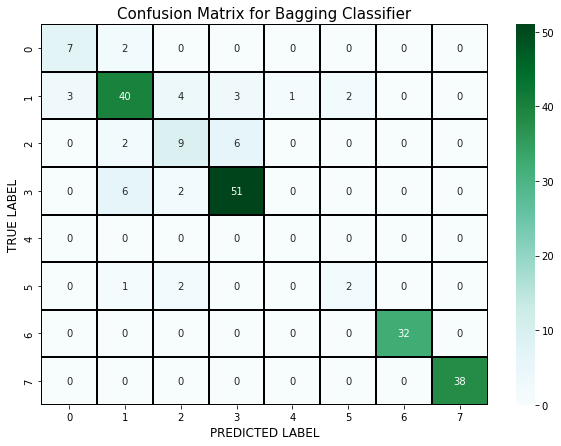

In [143]:
# let's plot confusion matrix for BC
cm = confusion_matrix(y_df_test,predBC)

x_axis_labels = ["0","1","2","3","4","5","6","7"]
y_axis_labels = ["0","1","2","3","4","5","6","7"]

f , ax = plt.subplots(figsize=(10,7))
sns.heatmap(cm, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, cmap="BuGn",xticklabels=x_axis_labels,yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL",fontsize = 12)
plt.ylabel("TRUE LABEL",fontsize = 12)
plt.title("Confusion Matrix for Bagging Classifier",fontsize = 15)
plt.show()

# Checking the Cross Validation Score

In [144]:
# cv scor for Decision Tree Classifier
print(cross_val_score(DTC ,x_df,y_df,cv=5).mean())

0.7908427932576538


In [145]:
# cv scor for Random Forest Classifier
print(cross_val_score(RFC ,x_df,y_df,cv=5).mean())

0.8237633298933608


In [146]:
# cv scor for Support Vector Classifier
print(cross_val_score(svc,x_df,y_df,cv=5).mean())

0.7285655314757482


In [147]:
# cv scor for KNeighbors Classifier
print(cross_val_score(knn ,x_df,y_df,cv=5).mean())

0.7485861713106294


In [148]:
# cv scor for Gradient Boosting Classifier
print(cross_val_score(GB ,x_df,y_df,cv=5).mean())

0.8284485724114207


In [149]:
# cv scor for Bagging Classifier
print(cross_val_score(BC ,x_df,y_df,cv=5).mean())

0.8119917440660475


# Hyper Parameter Tuning

In [150]:
# Gradient Boosting Classifier
parameters ={'criterion':['friedman_mse','mse','mae'],
            'max_features':['auto','sqrt','log2'],
            'n_estimators':[0,200],
            'max_depth':[2,3,4,5,6,8]}

In [151]:
GCV = GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [ ]:
GCV.fit(x_df_train,y_df_train) 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 230, in _check_params
    raise ValueError("n_estimators must be greater than 0 but "
ValueError: n_estimators must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 230, in _check_params
    raise ValueError("n_estimators must be greater than 0 but "
ValueError: n_estimators must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 230, in _check_params
    raise ValueError("n_estimators must be greater than 0 but "
ValueError: n_estimators must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 230, in _check_params
    raise ValueError("n_estimators must be greater than 0 but "
ValueError: n_estimators must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 230, in _check_params
    raise ValueError("n_estimators must be greater than 0 but "
ValueError: n_estimators must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 230, in _check_params
    raise ValueError("n_estimators must be greater than 0 but "
ValueError: n_estimators must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 230, in _check_params
    raise ValueError("n_estimators must be greater than 0 but "
ValueError: n_estimators must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 230, in _check_params
    raise ValueError("n_estimators must be greater than 0 but "
ValueError: n_estimators must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 230, in _check_params
    raise ValueError("n_estimators must be greater than 0 but "
ValueError: n_estimators must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 230, in _check_params
    raise ValueError("n_estimators must be greater than 0 but "
ValueError: n_estimators must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 230, in _check_params
    raise ValueError("n_estimators must be greater than 0 but "
ValueError: n_estimators must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 230, in _check_params
    raise ValueError("n_estimators must be greater than 0 but "
ValueError: n_estimators must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 230, in _check_params
    raise ValueError("n_estimators must be greater than 0 but "
ValueError: n_estimators must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 230, in _check_params
    raise ValueError("n_estimators must be greater than 0 but "
ValueError: n_estimators must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 230, in _check_params
    raise ValueError("n_estimators must be greater than 0 but "
ValueError: n_estimators must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 230, in _check_params
    raise ValueError("n_estimators must be greater than 0 but "
ValueError: n_estimators must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 230, in _check_params
    raise ValueError("n_estimators must be greater than 0 but "
ValueError: n_estimators must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 230, in _check_params
    raise ValueError("n_estimators must be greater than 0 but "
ValueError: n_estimators must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 448, in fit
    self._check_params()
  File "C:\Users\DELL\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py", line 230, in _check_params
    raise ValueError("n_estimators must be greater than 0 but "
ValueError: n_estimators must be greater than 0 but was 0

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

In [ ]:
GCV.best_params_

In [ ]:
fuel_type =GradientBoostingClassifier (criterion='mse', max_depth=5, max_features='sqrt', n_estimators=200)
fuel_type.fit(x_df_train,y_df_train)
pred = fuel_type.predict(x_df_test)
acc=accuracy_score(y_df_test,pred)
print(acc*100)

In [ ]:
#ROC and AUC for the final model:
from sklearn.metrics import roc_curve, auc

y_df_prob = fuel_type.fit(x_df_train,y_df_train).predict_proba(x_df_test)

macro_roc_auc_ovo = roc_auc_score(y_df_test, y_df_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_df_test, y_df_prob, multi_class="ovo", average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_df_test, y_df_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_df_test, y_df_prob, multi_class="ovr", average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("="*40)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

In [ ]:
#Saving the Model:
import joblib
joblib.dump(fuel_type,"Global_Power_Plant_(IND)_primary_fuel.pkl")